<a href="https://colab.research.google.com/github/Eleemon98/Colaboratory/blob/main/0313_%ED%9A%8C%EA%B7%80%EB%AA%A8%EB%8D%B8%EC%8B%A4%EC%8A%B5(%EC%98%81%ED%99%94%ED%9D%A5%ED%96%89%EC%98%88%EC%B8%A1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d asaniczka/tmdb-movies-dataset-2023-930k-movies

 97% 177M/182M [00:04<00:00, 34.9MB/s]
100% 182M/182M [00:04<00:00, 46.5MB/s]


In [4]:
!unzip /content/tmdb-movies-dataset-2023-930k-movies.zip

Archive:  /content/tmdb-movies-dataset-2023-930k-movies.zip
  inflating: TMDB_movie_dataset_v11.csv  


In [2]:
df = pd.read_csv('TMDB_movie_dataset_v11.csv')

In [3]:
df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili"
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,en,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin"
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish"
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,en,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian"


In [4]:
#데이터의 크기 확인
df.shape

(1006087, 23)

In [5]:
# 데이터의 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006087 entries, 0 to 1006086
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1006087 non-null  int64  
 1   title                 1006075 non-null  object 
 2   vote_average          1006087 non-null  float64
 3   vote_count            1006087 non-null  int64  
 4   status                1006087 non-null  object 
 5   release_date          888368 non-null   object 
 6   revenue               1006087 non-null  int64  
 7   runtime               1006087 non-null  int64  
 8   adult                 1006087 non-null  bool   
 9   backdrop_path         284586 non-null   object 
 10  budget                1006087 non-null  int64  
 11  homepage              108969 non-null   object 
 12  imdb_id               573316 non-null   object 
 13  original_language     1006087 non-null  object 
 14  original_title        1006075 non-

In [6]:
y = df['revenue']
X = df.iloc[:, [2,3,4,5,7,8,10,13,16,19,20,22]]

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006087 entries, 0 to 1006086
Data columns (total 12 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   vote_average          1006087 non-null  float64
 1   vote_count            1006087 non-null  int64  
 2   status                1006087 non-null  object 
 3   release_date          888368 non-null   object 
 4   runtime               1006087 non-null  int64  
 5   adult                 1006087 non-null  bool   
 6   budget                1006087 non-null  int64  
 7   original_language     1006087 non-null  object 
 8   popularity            1006087 non-null  float64
 9   genres                634198 non-null   object 
 10  production_companies  477803 non-null   object 
 11  spoken_languages      605540 non-null   object 
dtypes: bool(1), float64(2), int64(3), object(6)
memory usage: 85.4+ MB


In [7]:
# status가 released인 데이터만 사용
new_X = X[X['status'] == 'Released']

In [15]:
new_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 989428 entries, 0 to 1006086
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   vote_average          989428 non-null  float64
 1   vote_count            989428 non-null  int64  
 2   status                989428 non-null  object 
 3   release_date          884350 non-null  object 
 4   runtime               989428 non-null  int64  
 5   adult                 989428 non-null  bool   
 6   budget                989428 non-null  int64  
 7   original_language     989428 non-null  object 
 8   popularity            989428 non-null  float64
 9   genres                621634 non-null  object 
 10  production_companies  467875 non-null  object 
 11  spoken_languages      593631 non-null  object 
dtypes: bool(1), float64(2), int64(3), object(6)
memory usage: 91.5+ MB


In [8]:
# Null값 처리
new_X.isnull().sum()

vote_average                 0
vote_count                   0
status                       0
release_date            105078
runtime                      0
adult                        0
budget                       0
original_language            0
popularity                   0
genres                  367794
production_companies    521553
spoken_languages        395797
dtype: int64

In [9]:
# release_date의 Null 값은 앞에 데이터와 같은 값을 사용
new_X['release_date'] = new_X['release_date'].fillna(method='ffill')

<ipython-input-9-f3b41ba914e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_X['release_date'] = new_X['release_date'].fillna(method='ffill')


In [10]:
# genres의 Null 값은 모두 삭제
new_X.dropna(subset=['genres'], axis=0, inplace=True)

<ipython-input-10-a75b4bf4c113>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_X.dropna(subset=['genres'], axis=0, inplace=True)


In [11]:
# production_companies는 Null 값은 'Others'로 대체
new_X['production_companies'].fillna('Others', inplace=True)

<ipython-input-11-8a1aa1d8892d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_X['production_companies'].fillna('Others', inplace=True)


In [12]:
new_X['original_language'].value_counts()

en    293668
fr     40866
de     35494
es     33666
ja     28947
       ...  
kv         1
hz         1
kg         1
om         1
ii         1
Name: original_language, Length: 168, dtype: int64

In [13]:
new_X.dropna(inplace=True)

<ipython-input-13-0238587a8070>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_X.dropna(inplace=True)


In [14]:
new_X.isnull().sum()

vote_average            0
vote_count              0
status                  0
release_date            0
runtime                 0
adult                   0
budget                  0
original_language       0
popularity              0
genres                  0
production_companies    0
spoken_languages        0
dtype: int64

In [26]:
new_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471959 entries, 0 to 1006082
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   vote_average          471959 non-null  float64
 1   vote_count            471959 non-null  int64  
 2   status                471959 non-null  object 
 3   release_date          471959 non-null  object 
 4   runtime               471959 non-null  int64  
 5   adult                 471959 non-null  bool   
 6   budget                471959 non-null  int64  
 7   original_language     471959 non-null  object 
 8   popularity            471959 non-null  float64
 9   genres                471959 non-null  object 
 10  production_companies  471959 non-null  object 
 11  spoken_languages      471959 non-null  object 
dtypes: bool(1), float64(2), int64(3), object(6)
memory usage: 43.7+ MB


In [27]:
new_X

,vote_average,vote_count,status,release_date,runtime,adult,budget,original_language,popularity,genres,production_companies,spoken_languages
0,8.364,34495,Released,2010-07-15,148,False,160000000,en,83.952,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","English, French, Japanese, Swahili"
1,8.417,32571,Released,2014-11-05,169,False,165000000,en,140.241,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...",English
2,8.512,30619,Released,2008-07-16,152,False,185000000,en,130.643,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","English, Mandarin"
3,7.573,29815,Released,2009-12-15,162,False,237000000,en,79.932,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","English, Spanish"
4,7.710,29166,Released,2012-04-25,143,False,220000000,en,98.082,"Science Fiction, Action, Adventure",Marvel Studios,"English, Hindi, Russian"
...,...,...,...,...,...,...,...,...,...,...,...,...
1006066,0.000,0,Released,1967-02-25,98,False,0,ja,2.016,Drama,Nikkatsu Corporation,Japanese
1006069,0.000,0,Released,1925-05-10,60,False,0,en,0.915,"Drama, Romance",Banner Productions,No Language
1006075,0.000,0,Released,2013-10-30,11,False,0,en,0.600,"Science Fiction, Drama",Lightbirds Pictures Ltd.,English
1006079,0.000,0,Released,1968-05-29,109,False,0,ja,0.634,Drama,Nikkatsu Corporation,Japanese


In [15]:
y = y[new_X.index]

In [16]:
y

0           825532764
1           701729206
2          1004558444
3          2923706026
4          1518815515
              ...    
1006066             0
1006069             0
1006075             0
1006079             0
1006082             0
Name: revenue, Length: 471959, dtype: int64

In [17]:
# 수치형 데이터와 범주형 데이터를 분리
X_num = new_X.select_dtypes(include=['int64', 'float64'])
X_cat = new_X.select_dtypes(exclude=['int64', 'float64'])
print(X_num.shape, X_cat.shape)

(471959, 5) (471959, 7)


In [18]:
X_num.describe()

,vote_average,vote_count,runtime,budget,popularity
count,471959.000000,471959.000000,471959.000000,4.719590e+05,471959.000000
mean,3.220764,44.962162,62.201337,5.851919e+05,2.108378
std,3.269282,493.084504,62.946068,6.892883e+06,11.579548
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000,11.000000,0.000000e+00,0.600000
50%,3.200000,1.000000,73.000000,0.000000e+00,0.739000
75%,6.100000,4.000000,95.000000,0.000000e+00,1.514000
max,10.000000,34495.000000,14400.000000,8.880000e+08,2994.357000


In [19]:
X_num[X_num['vote_average'] == 0].sort_values(by=['vote_count'], ascending=False)

,vote_average,vote_count,runtime,budget,popularity
149950,0.0,3,106,0,0.758
153173,0.0,3,78,0,0.987
158279,0.0,3,89,0,0.600
167397,0.0,3,0,200,0.600
172021,0.0,3,110,150000,0.600
...,...,...,...,...,...
587134,0.0,0,50,0,0.600
587135,0.0,0,80,1,1.400
587136,0.0,0,18,0,0.600
587138,0.0,0,56,0,1.178


In [20]:
df_num = pd.concat([X_num, y], axis=1)
df_num

,vote_average,vote_count,runtime,budget,popularity,revenue
0,8.364,34495,148,160000000,83.952,825532764
1,8.417,32571,169,165000000,140.241,701729206
2,8.512,30619,152,185000000,130.643,1004558444
3,7.573,29815,162,237000000,79.932,2923706026
4,7.710,29166,143,220000000,98.082,1518815515
...,...,...,...,...,...,...
1006066,0.000,0,98,0,2.016,0
1006069,0.000,0,60,0,0.915,0
1006075,0.000,0,11,0,0.600,0
1006079,0.000,0,109,0,0.634,0


In [21]:
cond = (df_num['revenue'] > 0) & (df_num['vote_average'] == 0) & (df_num['vote_count'] == 0)

In [22]:
df_vote_avg = df_num[cond]

In [23]:
df_vote_avg

,vote_average,vote_count,runtime,budget,popularity,revenue
347778,0.0,0,0,0,0.600,88
348354,0.0,0,3,10,0.600,10
349287,0.0,0,0,150,0.000,110
349297,0.0,0,0,50,1.511,60
349367,0.0,0,0,219,0.000,98
...,...,...,...,...,...,...
1001379,0.0,0,75,100000,0.600,100000
1001392,0.0,0,0,10480,0.600,6500
1002665,0.0,0,8,80,1.400,350
1004273,0.0,0,53,55000,0.643,100000


In [78]:
(q1, q2, q3, q4) = (0, 3, 6, 10)

In [24]:
# 변경시키는 것
idx1 = int(len(df_vote_avg) * 0.25)
idx2 = int(len(df_vote_avg) * 0.50)
idx3 = int(len(df_vote_avg) * 0.75)
df_vote_avg = df_vote_avg.sort_values(by = ['revenue'])
df_vote_avg.iloc[idx1:idx2, 0] = 3
df_vote_avg.iloc[idx2:idx3, 0] = 6
df_vote_avg.iloc[idx3:, 0] = 10

In [25]:
df_vote_avg

,vote_average,vote_count,runtime,budget,popularity,revenue
631166,0.0,0,2,1,0.600,1
584618,0.0,0,1,1,0.600,1
790573,0.0,0,0,1,0.600,1
582200,0.0,0,4,1,0.616,1
839616,0.0,0,0,2,0.600,1
...,...,...,...,...,...,...
402495,10.0,0,0,60000000,1.400,487900000
605821,10.0,0,161,100000000,0.000,876688482
627000,10.0,0,3,1,0.726,1000000000
579540,10.0,0,0,10,0.600,1000000000


In [26]:
# 적용시키는 것
df_num.loc[df_vote_avg.index, :] = df_vote_avg

In [27]:
df_num.describe()

,vote_average,vote_count,runtime,budget,popularity,revenue
count,471959.000000,471959.000000,471959.000000,4.719590e+05,471959.000000,4.719590e+05
mean,3.234291,44.962162,62.201337,5.851919e+05,2.108378,1.533780e+06
std,3.271715,493.084504,62.946068,6.892883e+06,11.579548,2.547273e+07
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,0.000000,0.000000,11.000000,0.000000e+00,0.600000,0.000000e+00
50%,3.300000,1.000000,73.000000,0.000000e+00,0.739000,0.000000e+00
75%,6.100000,4.000000,95.000000,0.000000e+00,1.514000,0.000000e+00
max,10.000000,34495.000000,14400.000000,8.880000e+08,2994.357000,3.000000e+09


In [28]:
# apply는 각 요소마다 적용할 수 있게 해주는 함수이고, lambda까지 같이 이용하면 쉽게 해결 가능
df_num['runtime'] = df_num['runtime'].apply(lambda x : int(x/60) if x>1000 else x)

In [29]:
df_num.describe()

,vote_average,vote_count,runtime,budget,popularity,revenue
count,471959.000000,471959.000000,471959.000000,4.719590e+05,471959.000000,4.719590e+05
mean,3.234291,44.962162,62.040563,5.851919e+05,2.108378,1.533780e+06
std,3.271715,493.084504,50.215817,6.892883e+06,11.579548,2.547273e+07
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,0.000000,0.000000,11.000000,0.000000e+00,0.600000,0.000000e+00
50%,3.300000,1.000000,73.000000,0.000000e+00,0.739000,0.000000e+00
75%,6.100000,4.000000,95.000000,0.000000e+00,1.514000,0.000000e+00
max,10.000000,34495.000000,999.000000,8.880000e+08,2994.357000,3.000000e+09


In [30]:
X_cat.describe(include='O')

,status,release_date,original_language,genres,production_companies,spoken_languages
count,471959,471959,471959,471959,471959,471959
unique,1,38813,165,11522,158126,6568
top,Released,2009-01-01,en,Documentary,Others,English
freq,471959,1149,196236,82438,156211,158361


In [31]:
X_cat = X_cat.loc[:, 'release_date':]

In [32]:
# 날짜로 바꿈
X_cat['release_date'] = pd.to_datetime(X_cat['release_date'])

In [33]:
# 연도 뽑기, 월 뽑기
X_cat['year'] = X_cat['release_date'].dt.year
X_cat['month'] = X_cat['release_date'].dt.month

In [91]:
X_cat

,release_date,adult,original_language,genres,production_companies,spoken_languages,year,month
0,2010-07-15,False,en,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","English, French, Japanese, Swahili",2010,7
1,2014-11-05,False,en,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...",English,2014,11
2,2008-07-16,False,en,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","English, Mandarin",2008,7
3,2009-12-15,False,en,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","English, Spanish",2009,12
4,2012-04-25,False,en,"Science Fiction, Action, Adventure",Marvel Studios,"English, Hindi, Russian",2012,4
...,...,...,...,...,...,...,...,...
1006066,1967-02-25,False,ja,Drama,Nikkatsu Corporation,Japanese,1967,2
1006069,1925-05-10,False,en,"Drama, Romance",Banner Productions,No Language,1925,5
1006075,2013-10-30,False,en,"Science Fiction, Drama",Lightbirds Pictures Ltd.,English,2013,10
1006079,1968-05-29,False,ja,Drama,Nikkatsu Corporation,Japanese,1968,5


In [34]:
# 날짜 오브젝트 컬럼을 삭제
X_cat.drop('release_date', axis=1, inplace=True)

In [35]:
# 장르 부분 각 열마다 있는 장르를 나누기(리스트로 만들기)
X_cat['genres'] = X_cat['genres'].str.split(', ')

In [36]:
# 장르 부분을 유니크한 값들만 빼내기
genres = []
for g in X_cat['genres']:
  for t in g:
    if t not in genres:
      genres.append(t)

genres

['Action',
 'Science Fiction',
 'Adventure',
 'Drama',
 'Crime',
 'Thriller',
 'Fantasy',
 'Comedy',
 'Romance',
 'Western',
 'Mystery',
 'War',
 'Animation',
 'Family',
 'Horror',
 'Music',
 'History',
 'TV Movie',
 'Documentary']

In [100]:
# 위에 뽑은 장르들을 컬럼으로 만들어서 속하는 것에 True로 표시하기
for g in genres:
  for x in X_cat['genres']: # x는 위에서 리스트로 만든 장르 부분에 요소 하나
    if g in x:
      X_cat[g] = True
    else:
      X_cat[g] = False

KeyboardInterrupt: 

In [37]:
# 위에 뽑은 장르들을 컬럼으로 만들어서 속하는 것에 True로 표시하기
genres_col=[]
for x in X_cat['genres']:
  result = []
  for g in genres:
    if g in x:
      result.append(True)
    else:
      result.append(False)
  genres_col.append(result)

In [38]:
# 장르가 컬럼으로 된 데이터 프레임 만들기
df_genre = pd.DataFrame(genres_col, columns=genres)
df_genre.head()

,Action,Science Fiction,Adventure,Drama,Crime,Thriller,Fantasy,Comedy,Romance,Western,Mystery,War,Animation,Family,Horror,Music,History,TV Movie,Documentary
0,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
4,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [39]:
# index를 X_cat의 인덱스로 바꿔주기
df_genre.set_index(X_cat.index, drop=True, inplace=True)
df_genre

,Action,Science Fiction,Adventure,Drama,Crime,Thriller,Fantasy,Comedy,Romance,Western,Mystery,War,Animation,Family,Horror,Music,History,TV Movie,Documentary
0,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
4,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006066,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1006069,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1006075,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1006079,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [40]:
# X_cat과 df_genre 데이터프레임을 합치기
X_cat = pd.concat([X_cat, df_genre], axis=1)

In [41]:
# companies도 리스트로 나누기
X_cat['production_companies'] = X_cat['production_companies'].str.split(', ')

In [42]:
# 컴퍼니 부분을 유니크한 값들만 빼내기
company = []
for p in X_cat['production_companies']:
  for t in p:
    if t not in company:
      company.append(t)

company

KeyboardInterrupt: 

In [114]:
df = pd.DataFrame({'company':company})
df.to_csv('companies.csv', encoding='utf-8', index=False)

In [43]:
X_cat.drop('production_companies', axis=1, inplace=True)

In [44]:
X_cat['spoken_languages'] = X_cat['spoken_languages'].str.split(', ')

In [45]:
from tqdm import tqdm
languages = []
for s in tqdm(X_cat['spoken_languages']):
  for t in s:
    if t not in languages:
      languages.append(t)

languages

100%|██████████| 471959/471959 [00:00<00:00, 645766.64it/s]


['English',
 'French',
 'Japanese',
 'Swahili',
 'Mandarin',
 'Spanish',
 'Hindi',
 'Russian',
 'Xhosa',
 'Persian',
 'Urdu',
 'Arabic',
 'German',
 'Swedish',
 'Italian',
 'Romanian',
 'Korean',
 'Norwegian',
 'Latin',
 'Tagalog',
 'Hungarian',
 'Cantonese',
 'Turkish',
 'Greek',
 'Malay',
 'Czech',
 'Polish',
 'Hebrew',
 'Dutch',
 'Vietnamese',
 'Yiddish',
 'Tamil',
 'Finnish',
 'Somali',
 'Nepali',
 'Tibetan',
 'Portuguese',
 'Gaelic',
 'Albanian',
 'Thai',
 'Indonesian',
 'Danish',
 'Irish',
 'Estonian',
 'Afrikaans',
 'Chichewa; Nyanja',
 'Sotho',
 'Zulu',
 'Sinhalese',
 'Khmer',
 'Bulgarian',
 'Icelandic',
 'Samoan',
 'Bengali',
 'Esperanto',
 'Haitian; Haitian Creole',
 'Ukrainian',
 'Breton',
 'Croatian',
 'Inuktitut',
 'Armenian',
 'Sanskrit',
 'Georgian',
 'Pushto',
 'Burmese',
 'Northern Sami',
 'Slovak',
 'Quechua',
 'Navajo',
 'No Language',
 'Serbian',
 'Serbo-Croatian',
 'Welsh',
 'Moldavian',
 'Cornish',
 'Lithuanian',
 'Fulah',
 'Punjabi',
 'Catalan',
 'Akan',
 'Maltes

In [46]:
language_col=[]
for x in X_cat['spoken_languages']:
  result = []
  for l in languages:
    if l in x:
      result.append(True)
    else:
      result.append(False)
  language_col.append(result)

In [47]:
# 컴퍼니가 컬럼으로 된 데이터 프레임 만들기
df_language = pd.DataFrame(language_col, columns=languages)
df_language.head()

,English,French,Japanese,Swahili,Mandarin,Spanish,Hindi,Russian,Xhosa,Persian,...,Volapük,Tsonga,Interlingua,Chamorro,Komi,Kuanyama,Swati,Luba-Katanga,Ndonga,Avestan
0,True,True,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [48]:
# index를 X_cat의 인덱스로 바꿔주기
df_language.set_index(X_cat.index, drop=True, inplace=True)
df_language

,English,French,Japanese,Swahili,Mandarin,Spanish,Hindi,Russian,Xhosa,Persian,...,Volapük,Tsonga,Interlingua,Chamorro,Komi,Kuanyama,Swati,Luba-Katanga,Ndonga,Avestan
0,True,True,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006066,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1006069,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1006075,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1006079,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [49]:
# X_cat과 df_genre 데이터프레임을 합치기
X_cat = pd.concat([X_cat, df_language], axis=1)

In [50]:
df = X_cat.copy()
df.to_csv('movie.csv', encoding='utf-8', index=False)

KeyboardInterrupt: 

In [124]:
df

,adult,original_language,genres,spoken_languages,year,month,Action,Science Fiction,Adventure,Drama,...,Volapük,Tsonga,Interlingua,Chamorro,Komi,Kuanyama,Swati,Luba-Katanga,Ndonga,Avestan
0,False,en,"[Action, Science Fiction, Adventure]","[English, French, Japanese, Swahili]",2010,7,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,en,"[Adventure, Drama, Science Fiction]",[English],2014,11,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,False,en,"[Drama, Action, Crime, Thriller]","[English, Mandarin]",2008,7,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,False,en,"[Action, Adventure, Fantasy, Science Fiction]","[English, Spanish]",2009,12,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,en,"[Science Fiction, Action, Adventure]","[English, Hindi, Russian]",2012,4,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006066,False,ja,[Drama],[Japanese],1967,2,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1006069,False,en,"[Drama, Romance]",[No Language],1925,5,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1006075,False,en,"[Science Fiction, Drama]",[English],2013,10,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1006079,False,ja,[Drama],[Japanese],1968,5,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [51]:
# 장르와 언어 제거
X_cat.drop(['genres',	'spoken_languages'], axis=1, inplace=True)

In [126]:
X_cat

,adult,original_language,year,month,Action,Science Fiction,Adventure,Drama,Crime,Action,...,Volapük,Tsonga,Interlingua,Chamorro,Komi,Kuanyama,Swati,Luba-Katanga,Ndonga,Avestan
0,False,en,2010,7,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,en,2014,11,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,en,2008,7,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
3,False,en,2009,12,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,en,2012,4,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006066,False,ja,1967,2,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1006069,False,en,1925,5,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1006075,False,en,2013,10,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1006079,False,ja,1968,5,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [52]:
X_cat['year'].value_counts()

2022    22034
2021    21514
2019    20938
2020    19901
2023    19208
        ...  
1885        1
1889        1
2027        1
1865        1
1874        1
Name: year, Length: 144, dtype: int64

In [53]:
X_cat = X_cat[(X_cat['year'] > 1950) & (X_cat['year'] < 2025)]

In [54]:
X_cat['year'].value_counts()

2022    22034
2021    21514
2019    20938
2020    19901
2023    19208
        ...  
1954     1572
1953     1528
1952     1497
1951     1489
2024     1235
Name: year, Length: 74, dtype: int64

In [55]:
# 어느 달에 제일 많이 개봉했는지 시각화하기
X_cat['month'].value_counts()

1     77098
10    41671
9     37481
11    36486
12    35144
3     32535
6     31629
4     30929
5     29711
8     28637
2     27038
7     25904
Name: month, dtype: int64

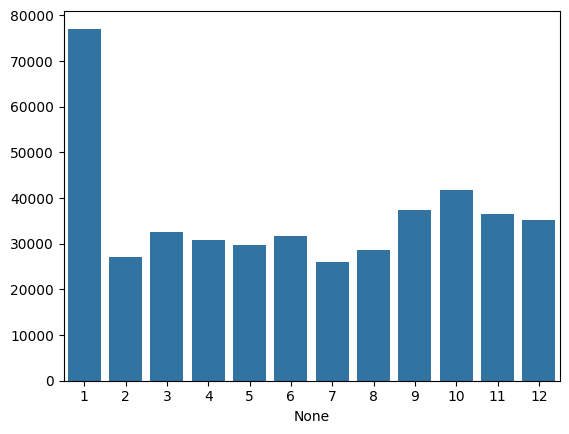

In [135]:
mon_cnt = X_cat['month'].value_counts()
sns.barplot(x = mon_cnt.index, y= mon_cnt.values)
plt.show()

In [142]:
X_cat['Action'].sum()

Action        0
Action    33298
dtype: int64

In [143]:
df_num

,vote_average,vote_count,runtime,budget,popularity,revenue
0,8.364,34495,148,160000000,83.952,825532764
1,8.417,32571,169,165000000,140.241,701729206
2,8.512,30619,152,185000000,130.643,1004558444
3,7.573,29815,162,237000000,79.932,2923706026
4,7.710,29166,143,220000000,98.082,1518815515
...,...,...,...,...,...,...
1006066,0.000,0,98,0,2.016,0
1006069,0.000,0,60,0,0.915,0
1006075,0.000,0,11,0,0.600,0
1006079,0.000,0,109,0,0.634,0


In [145]:
df_ko = X_cat[X_cat['original_language'] == 'ko']

In [146]:
df_ko.groupby(['year']).sum()

<ipython-input-146-1e7f0d3686a6>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ko.groupby(['year']).sum()


,adult,month,Action,Science Fiction,Adventure,Drama,Crime,Action,Science Fiction,Adventure,...,Volapük,Tsonga,Interlingua,Chamorro,Komi,Kuanyama,Swati,Luba-Katanga,Ndonga,Avestan
year,,,,,,,,,,,,,,,,,,,,,
1951,0,17,0,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1952,0,12,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1953,0,3,0,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1954,0,13,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1955,0,50,0,0,0,8,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,7,5191,0,0,0,732,0,44,17,4,...,0,0,0,0,0,0,0,0,0,0
2021,15,3971,0,0,0,572,0,27,14,5,...,0,0,0,0,0,0,0,0,0,0
2022,10,3469,0,0,0,516,0,40,11,7,...,0,0,0,0,0,0,0,0,0,0


In [168]:
df = pd.concat([df_num, X_cat], axis=1)
df

,vote_average,vote_count,runtime,budget,popularity,revenue,adult,original_language,year,month,...,Volapük,Tsonga,Interlingua,Chamorro,Komi,Kuanyama,Swati,Luba-Katanga,Ndonga,Avestan
0,8.364,34495,148,160000000,83.952,825532764,False,en,2010.0,7.0,...,False,False,False,False,False,False,False,False,False,False
1,8.417,32571,169,165000000,140.241,701729206,False,en,2014.0,11.0,...,False,False,False,False,False,False,False,False,False,False
2,8.512,30619,152,185000000,130.643,1004558444,False,en,2008.0,7.0,...,False,False,False,False,False,False,False,False,False,False
3,7.573,29815,162,237000000,79.932,2923706026,False,en,2009.0,12.0,...,False,False,False,False,False,False,False,False,False,False
4,7.710,29166,143,220000000,98.082,1518815515,False,en,2012.0,4.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006066,0.000,0,98,0,2.016,0,False,ja,1967.0,2.0,...,False,False,False,False,False,False,False,False,False,False
1006069,0.000,0,60,0,0.915,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1006075,0.000,0,11,0,0.600,0,False,en,2013.0,10.0,...,False,False,False,False,False,False,False,False,False,False
1006079,0.000,0,109,0,0.634,0,False,ja,1968.0,5.0,...,False,False,False,False,False,False,False,False,False,False


In [169]:
df_ko = df[df['original_language'] == 'ko']
df_ko = df_ko.groupby(['year']).sum()

<ipython-input-169-ecb1dbdff914>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ko = df_ko.groupby(['year']).sum()


In [170]:
df_ko_year = df_ko[df_ko['revenue'] > 0]

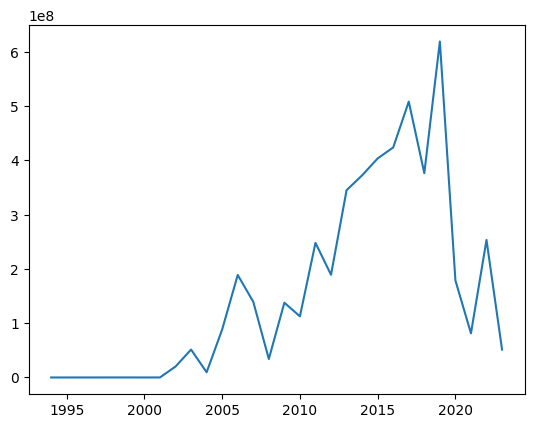

In [171]:
plt.plot(df_ko_year.index, df_ko_year['revenue'])
plt.show()

In [56]:
# 스케일링
df_num.describe()

,vote_average,vote_count,runtime,budget,popularity,revenue
count,471959.000000,471959.000000,471959.000000,4.719590e+05,471959.000000,4.719590e+05
mean,3.234291,44.962162,62.040563,5.851919e+05,2.108378,1.533780e+06
std,3.271715,493.084504,50.215817,6.892883e+06,11.579548,2.547273e+07
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,0.000000,0.000000,11.000000,0.000000e+00,0.600000,0.000000e+00
50%,3.300000,1.000000,73.000000,0.000000e+00,0.739000,0.000000e+00
75%,6.100000,4.000000,95.000000,0.000000e+00,1.514000,0.000000e+00
max,10.000000,34495.000000,999.000000,8.880000e+08,2994.357000,3.000000e+09


In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_num = scaler.fit_transform(df_num)
df_nums = pd.DataFrame(X_num, columns = df_num.columns)
df_nums.describe()

,vote_average,vote_count,runtime,budget,popularity,revenue
count,4.719590e+05,4.719590e+05,4.719590e+05,4.719590e+05,4.719590e+05,4.719590e+05
mean,-1.368215e-16,3.215786e-17,-8.816313e-17,4.914011e-17,-6.455661e-17,1.300767e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-9.885622e-01,-9.118561e-02,-1.235480e+00,-8.489809e-02,-1.820780e-01,-6.021270e-02
25%,-9.885622e-01,-9.118561e-02,-1.016425e+00,-8.489809e-02,-1.302624e-01,-6.021270e-02
50%,2.008414e-02,-8.915755e-02,2.182469e-01,-8.489809e-02,-1.182585e-01,-6.021270e-02
75%,8.759053e-01,-8.307340e-02,6.563564e-01,-8.489809e-02,-5.133007e-02,-6.021270e-02
max,2.067942e+00,6.986647e+01,1.865867e+01,1.287438e+02,2.584083e+02,1.177129e+02


In [58]:
X_cat

,adult,original_language,year,month,Action,Science Fiction,Adventure,Drama,Crime,Thriller,...,Volapük,Tsonga,Interlingua,Chamorro,Komi,Kuanyama,Swati,Luba-Katanga,Ndonga,Avestan
0,False,en,2010,7,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,en,2014,11,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,en,2008,7,True,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,False,en,2009,12,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,en,2012,4,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006064,False,es,2019,6,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1006066,False,ja,1967,2,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1006075,False,en,2013,10,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1006079,False,ja,1968,5,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [59]:
# encoding

one_hot = pd.get_dummies(X_cat['original_language'], drop_first=True)
one_hot

,af,ak,am,ar,as,ay,az,ba,be,bg,...,uz,vi,wo,xh,xx,yi,yo,za,zh,zu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006064,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1006066,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1006075,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1006079,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
X_cat.drop('original_language', axis=1, inplace=True)
df_cat = pd.concat([X_cat, one_hot], axis=1)
df_cat

,adult,year,month,Action,Science Fiction,Adventure,Drama,Crime,Thriller,Fantasy,...,uz,vi,wo,xh,xx,yi,yo,za,zh,zu
0,False,2010,7,True,True,True,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
1,False,2014,11,False,True,True,True,False,False,False,...,0,0,0,0,0,0,0,0,0,0
2,False,2008,7,True,False,False,True,True,True,False,...,0,0,0,0,0,0,0,0,0,0
3,False,2009,12,True,True,True,False,False,False,True,...,0,0,0,0,0,0,0,0,0,0
4,False,2012,4,True,True,True,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006064,False,2019,6,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
1006066,False,1967,2,False,False,False,True,False,False,False,...,0,0,0,0,0,0,0,0,0,0
1006075,False,2013,10,False,True,False,True,False,False,False,...,0,0,0,0,0,0,0,0,0,0
1006079,False,1968,5,False,False,False,True,False,False,False,...,0,0,0,0,0,0,0,0,0,0


In [61]:
# 수치형 데이터와 범주형 데이터 합치기
y = df_num['revenue'].loc[df_cat.index]
df_nums.set_index(df_num.index, drop=True, inplace=True)
X = pd.concat([df_nums.iloc[:,:-1], df_cat], axis=1, join='inner')

In [62]:
X

,vote_average,vote_count,runtime,budget,popularity,adult,year,month,Action,Science Fiction,...,uz,vi,wo,xh,xx,yi,yo,za,zh,zu
0,1.567898,69.866471,1.711802,23.127476,7.067953,False,2010,7,True,True,...,0,0,0,0,0,0,0,0,0,0
1,1.584097,65.964499,2.129997,23.852863,11.929029,False,2014,11,False,True,...,0,0,0,0,0,0,0,0,0,0
2,1.613134,62.005741,1.791458,26.754409,11.100153,False,2008,7,True,False,...,0,0,0,0,0,0,0,0,0,0
3,1.326128,60.375187,1.990599,34.298431,6.720789,False,2009,12,True,True,...,0,0,0,0,0,0,0,0,0,0
4,1.368002,59.058982,1.612232,31.832116,8.288210,False,2012,4,True,True,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006064,-0.988562,-0.091186,0.556786,-0.084898,-0.130262,False,2019,6,False,False,...,0,0,0,0,0,0,0,0,0,0
1006066,-0.988562,-0.091186,0.716099,-0.084898,-0.007978,False,1967,2,False,False,...,0,0,0,0,0,0,0,0,0,0
1006075,-0.988562,-0.091186,-1.016425,-0.084898,-0.130262,False,2013,10,False,True,...,0,0,0,0,0,0,0,0,0,0
1006079,-0.988562,-0.091186,0.935153,-0.084898,-0.127326,False,1968,5,False,False,...,0,0,0,0,0,0,0,0,0,0


In [73]:
# 학습 데이터와 평가 데이터 분리
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(X, y,
                                                      test_size=0.3,
                                                      random_state = 2)

In [74]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(303984, 373) (130279, 373)
(303984,) (130279,)


In [75]:
from sklearn.linear_model import LinearRegression

lrm = LinearRegression()
lrm.fit(X_train, y_train)

LinearRegression()

In [76]:
pred = lrm.predict(X_test)
pred

array([  218745.05075969,  -587267.05660766,  -292788.66908814, ...,
       -1987327.41413093,  -182179.41566094,   454196.72247343])

In [77]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from math import sqrt

print('MAE :', mean_absolute_error(y_test, pred))
print('MSE :', mean_squared_error(y_test, pred))
print('RMSE :', sqrt(mean_squared_error(y_test, pred)))
print('MAPE :', mean_absolute_percentage_error(y_test, pred))
print('r2 Score :', r2_score(y_test, pred))

MAE : 2092833.5996672406
MSE : 257962276353089.44
RMSE : 16061204.07544495
MAPE : 4.699575164375039e+21
r2 Score : 0.657720098671656


In [78]:
# 여러가지 모델을 합쳐서 확인하는 모델
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

xgb = XGBRegressor(n_estimators = 10)
lgb = LGBMRegressor(n_estimators= 1000)

xgb.fit(X_train, y_train)
lgb.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.466950 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1819
[LightGBM] [Info] Number of data points in the train set: 303984, number of used features: 237
[LightGBM] [Info] Start training from score 1659529.633829


LGBMRegressor(n_estimators=1000)

In [79]:
pred_xgb = xgb.predict(X_test)

print('MAE :', mean_absolute_error(y_test, pred_xgb))
print('MSE :', mean_squared_error(y_test, pred_xgb))
print('RMSE :', sqrt(mean_squared_error(y_test, pred_xgb)))
print('MAPE :', mean_absolute_percentage_error(y_test, pred_xgb))
print('r2 Score :', r2_score(y_test, pred_xgb))

MAE : 1098068.5118454313
MSE : 244582959039365.2
RMSE : 15639148.283693878
MAPE : 1.1375125623712774e+21
r2 Score : 0.6754725835493827


In [80]:
pred_lgb = lgb.predict(X_test)

print('MAE :', mean_absolute_error(y_test, pred_lgb))
print('MSE :', mean_squared_error(y_test, pred_lgb))
print('RMSE :', sqrt(mean_squared_error(y_test, pred_lgb)))
print('MAPE :', mean_absolute_percentage_error(y_test, pred_lgb))
print('r2 Score :', r2_score(y_test, pred_lgb))

MAE : 1045364.0428800241
MSE : 206814013507676.5
RMSE : 14381029.64003887
MAPE : 9.53476936574684e+20
r2 Score : 0.7255866976463106


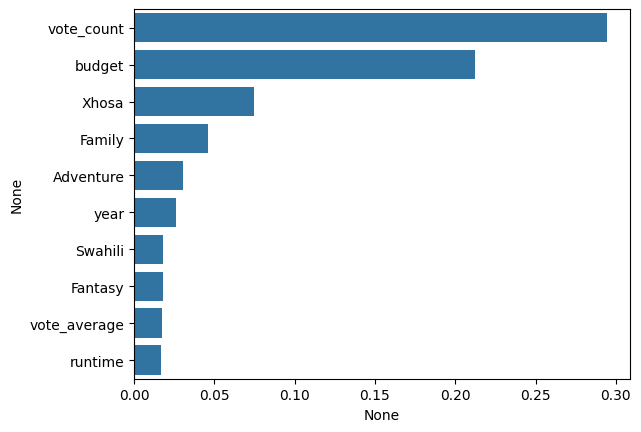

In [81]:
# 모델이 예측할 때 영향을 많이 받는 컬럼이 뭔지 알아내는 코드
# 부정적인 영향인지 긍정적인 영향인지는 알 수 없음
feature_sr = pd.Series(data=xgb.feature_importances_, index=X.columns)
feature_sr = feature_sr.sort_values(ascending=False)[:10]
sns.barplot(x=feature_sr, y=feature_sr.index)
plt.show()

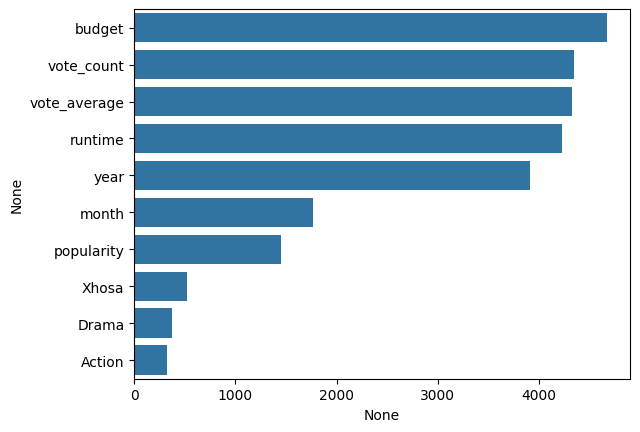

In [82]:
feature_sr = pd.Series(data=lgb.feature_importances_, index=X.columns)
feature_sr = feature_sr.sort_values(ascending=False)[:10]
sns.barplot(x=feature_sr, y=feature_sr.index)
plt.show()